Преобразование изображений с помощью автокодировщика

## Задание Pro


Обучите автокодировщик на 10 красивых цифрах 5 из mnist и отредактируйте с помощью него все остальные цифры 5.

Алгоритм действий:
1. Выберите 10 самых красивых по вашем мнению пятерок в тренировочной выборке mnist. 
2. Создайте датасет, где объекты – это все пятерки из тренировочной части mnist, а метки – это случайные пятерки из "красивого" набора. 
3. Создайте автокодировщик и проверьте, совпадают ли у него размеры выхода и входа.
4. Обучите автокодировщик.
5. Добейтесь ошибки MSE на тренировочной выборке **<0.05**. 
6. Посмотрите, как выглядят пятерки из тестовой выборки после обученного автокодировщика.

## Импорт библиотек

In [ ]:
# Для операций с тензорами
import numpy as np

# Для отрисвоки
import matplotlib.pyplot as plt

# Для создания модели
from tensorflow.keras.models import Model

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization

# Слои для латентного пространства модели
from tensorflow.keras.layers import Flatten, Reshape, Dense

# Оптимизатор
from tensorflow.keras.optimizers import Adam

# Для загрузки базы
from tensorflow.keras.datasets import mnist

import random

## Загрузка данных

In [ ]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Нормализация данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Приведение формы к удобной для Keras
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Отбор пятерок
mask = y_train == 5
X_train = X_train[mask]
y_train = y_train[mask]

In [ ]:
# Аналогично для тестирования
mask = y_test == 5
X_test = X_test[mask]
y_test = y_test[mask]

## Отбор красивых пятерок

In [ ]:
#########################################################
###             МЕСТО ДЛЯ ВАШЕГО КОДА              ###
#########################################################

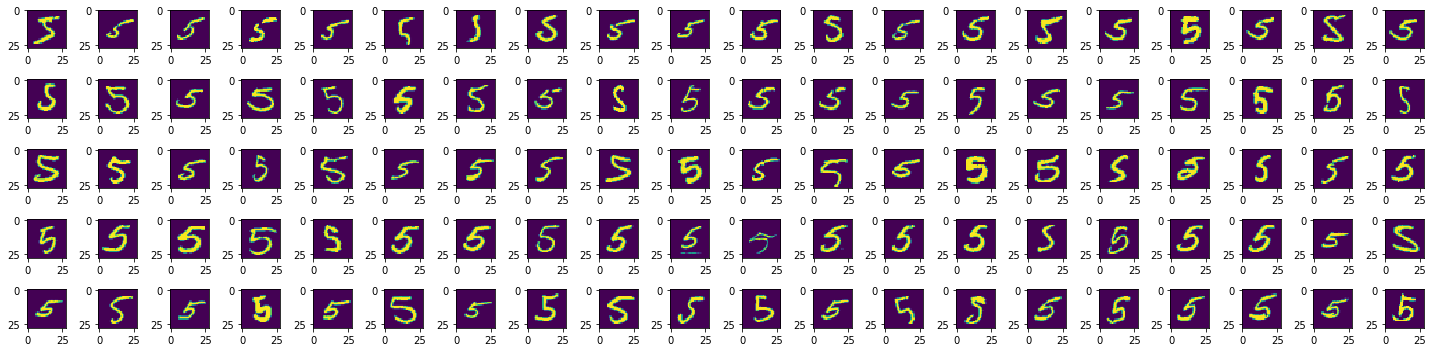

In [ ]:
fig, ax = plt.subplots(5,20,figsize=(20,5))
#fig.autofmt_xdate(rotation=45)
for index in range(100):
  c1=ax[int(index/20),int(index%20)].imshow(X_train[index].reshape(28,28), interpolation='nearest')
plt.tight_layout()
plt.show()

In [ ]:
Selected=[2,66,68,73,30,76,22,96,77,97]

18 нейронов в скрытом пространстве

In [ ]:
epochs=100
SHAPE=X_train[0].shape
inputs = Input(SHAPE)
pre_flat_shape=inputs.shape[1:]
flat_shape=pre_flat_shape[0]*pre_flat_shape[1]*pre_flat_shape[2]
print(pre_flat_shape,flat_shape)
x=Conv2D(32,3, activation='relu')(inputs)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(64,4, activation='relu')(x)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(2,3, activation='relu')(x)
print(x.shape)
BeforeFlattenShape=x.shape[1:]
x=Flatten()(x)
FlattenShape=x.shape[1:]
print(x.shape)
#x=Dense(100, activation='relu')(x)
encoded = BatchNormalization()(x)

input_encoded = Input(shape=FlattenShape)

x=Reshape(BeforeFlattenShape)(input_encoded)
print(x.shape)
x=Conv2DTranspose(64,3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 4, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(16, 3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(1, 1, activation='relu')(x)
print(x.shape)

#x=Conv2DTranspose(128,4, activation='relu')(x)
#x=Dense(1000, activation='relu')(x)
#x=Dense(flat_shape, activation='relu')(x)
outputs=x#Reshape(pre_flat_shape)(x)

encoder = Model(inputs, encoded, name='encoder')
print()
decoder = Model(input_encoded, outputs, name='decoder')
print()
autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


#model=Model(inputs=inputs, outputs=outputs)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(0.001),metrics=['accuracy'])
encoder.summary()
decoder.summary()
autoencoder.summary()

#TrainSize=int(X_train.shape[0]*0.9)

history = autoencoder.fit(X_train,X_train[random.choices(Selected,k=X_train.shape[0])],epochs=epochs, batch_size=128)

(28, 28, 1) 784
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 10, 10, 64)
(None, 5, 5, 64)
(None, 3, 3, 2)
(None, 18)
(None, 3, 3, 2)
(None, 5, 5, 64)
(None, 10, 10, 64)
(None, 13, 13, 32)
(None, 26, 26, 32)
(None, 28, 28, 16)
(None, 28, 28, 1)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_poolin

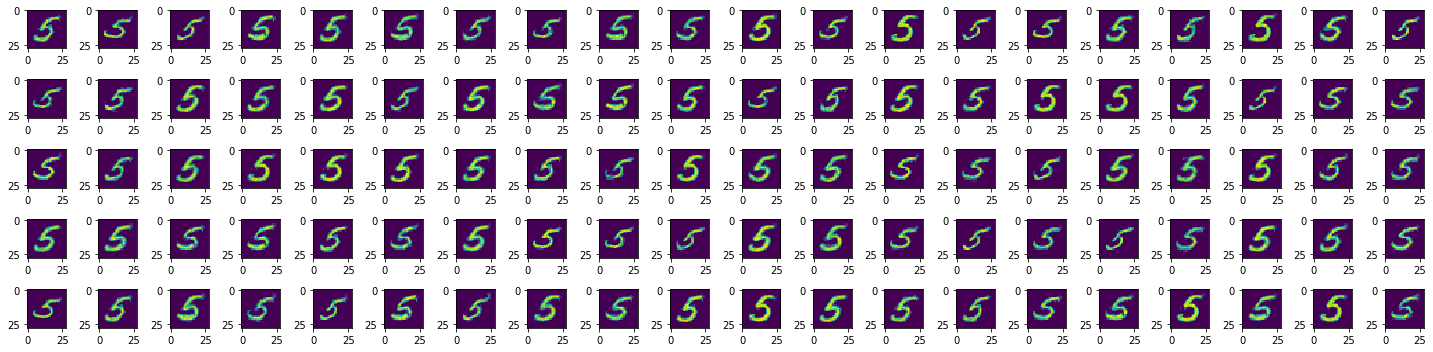

In [ ]:
X_train_new=autoencoder.predict(X_train[:100])

fig, ax = plt.subplots(5,20,figsize=(20,5))
for index in range(100):
  c1=ax[int(index/20),int(index%20)].imshow(X_train_new[index].reshape(28,28), interpolation='nearest')
plt.tight_layout()
plt.show()

72 нейрона в скрытом пространстве

In [ ]:
epochs=100
SHAPE=X_train[0].shape
inputs = Input(SHAPE)
pre_flat_shape=inputs.shape[1:]
flat_shape=pre_flat_shape[0]*pre_flat_shape[1]*pre_flat_shape[2]
print(pre_flat_shape,flat_shape)
x=Conv2D(32,3, activation='relu')(inputs)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(64,4, activation='relu')(x)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(8,3, activation='relu')(x)
print(x.shape)
BeforeFlattenShape=x.shape[1:]
x=Flatten()(x)
FlattenShape=x.shape[1:]
print(x.shape)
#x=Dense(100, activation='relu')(x)
encoded = BatchNormalization()(x)

input_encoded = Input(shape=FlattenShape)

x=Reshape(BeforeFlattenShape)(input_encoded)
print(x.shape)
x=Conv2DTranspose(64,3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 4, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(16, 3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(1, 1, activation='relu')(x)
print(x.shape)

#x=Conv2DTranspose(128,4, activation='relu')(x)
#x=Dense(1000, activation='relu')(x)
#x=Dense(flat_shape, activation='relu')(x)
outputs=x#Reshape(pre_flat_shape)(x)

encoder = Model(inputs, encoded, name='encoder')
print()
decoder = Model(input_encoded, outputs, name='decoder')
print()
autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


#model=Model(inputs=inputs, outputs=outputs)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(0.001),metrics=['accuracy'])
encoder.summary()
decoder.summary()
autoencoder.summary()

#TrainSize=int(X_train.shape[0]*0.9)

history = autoencoder.fit(X_train,X_train[random.choices(Selected,k=X_train.shape[0])],epochs=epochs, batch_size=128)

(28, 28, 1) 784
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 10, 10, 64)
(None, 5, 5, 64)
(None, 3, 3, 8)
(None, 72)
(None, 3, 3, 8)
(None, 5, 5, 64)
(None, 10, 10, 64)
(None, 13, 13, 32)
(None, 26, 26, 32)
(None, 28, 28, 16)
(None, 28, 28, 1)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_poolin

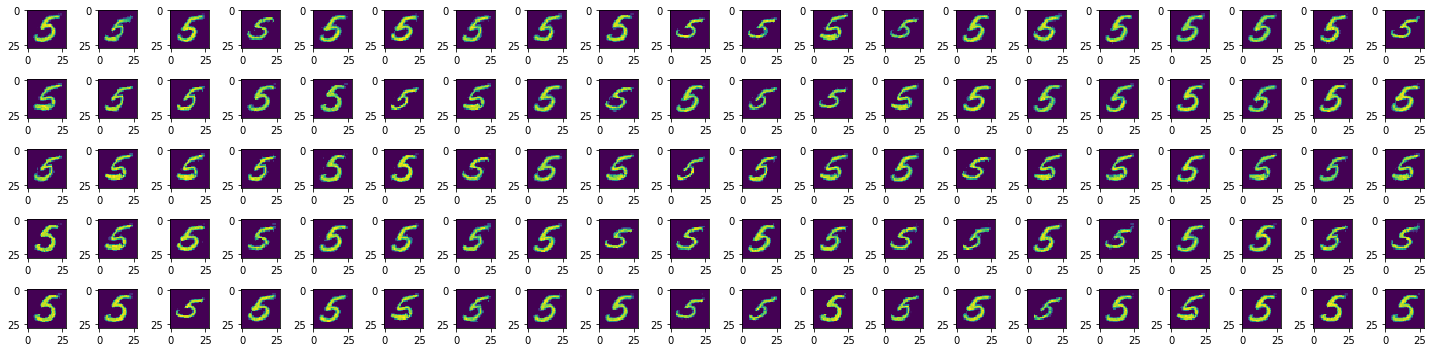

In [ ]:
X_train_new=autoencoder.predict(X_train[:100])

fig, ax = plt.subplots(5,20,figsize=(20,5))
for index in range(100):
  c1=ax[int(index/20),int(index%20)].imshow(X_train_new[index].reshape(28,28), interpolation='nearest')
plt.tight_layout()
plt.show()

Дальше эксперименты, попытки обучить только на 10 выбраных картинках. Можно не смотреть.

In [ ]:
epochs=100
SHAPE=X_train[0].shape
inputs = Input(SHAPE)
pre_flat_shape=inputs.shape[1:]
flat_shape=pre_flat_shape[0]*pre_flat_shape[1]*pre_flat_shape[2]
print(pre_flat_shape,flat_shape)
x=Conv2D(32,3, activation='relu')(inputs)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(64,4, activation='relu')(x)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(8,3, activation='relu')(x)
print(x.shape)
BeforeFlattenShape=x.shape[1:]
x=Flatten()(x)
FlattenShape=x.shape[1:]
print(x.shape)
#x=Dense(100, activation='relu')(x)
encoded = BatchNormalization()(x)

input_encoded = Input(shape=FlattenShape)

x=Reshape(BeforeFlattenShape)(input_encoded)
print(x.shape)
x=Conv2DTranspose(64,3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 4, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(16, 3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(1, 1, activation='relu')(x)
print(x.shape)

#x=Conv2DTranspose(128,4, activation='relu')(x)
#x=Dense(1000, activation='relu')(x)
#x=Dense(flat_shape, activation='relu')(x)
outputs=x#Reshape(pre_flat_shape)(x)

encoder = Model(inputs, encoded, name='encoder')
print()
decoder = Model(input_encoded, outputs, name='decoder')
print()
autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


#model=Model(inputs=inputs, outputs=outputs)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(0.001),metrics=['accuracy'])
encoder.summary()
decoder.summary()
autoencoder.summary()

TrainSize=int(X_train.shape[0]*0.9)

history = autoencoder.fit(X_train[Selected],X_train[Selected],validation_data=(X_train,X_train),epochs=epochs, batch_size=128)

(28, 28, 1) 784
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 10, 10, 64)
(None, 5, 5, 64)
(None, 3, 3, 8)
(None, 72)
(None, 3, 3, 8)
(None, 5, 5, 64)
(None, 10, 10, 64)
(None, 13, 13, 32)
(None, 26, 26, 32)
(None, 28, 28, 16)
(None, 28, 28, 1)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_poolin

In [ ]:
X_train_new=autoencoder.predict(X_train[:100])

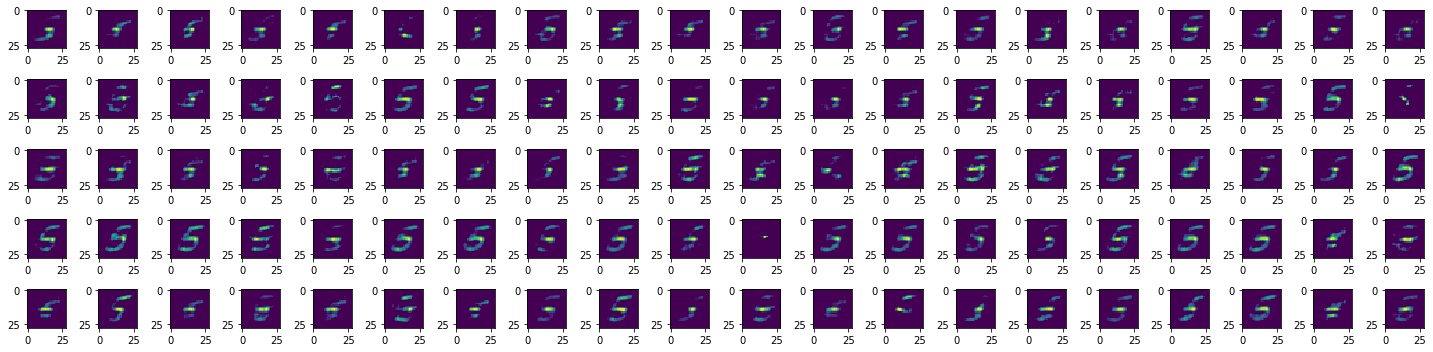

In [ ]:
fig, ax = plt.subplots(5,20,figsize=(20,5))
for index in range(100):
  c1=ax[int(index/20),int(index%20)].imshow(X_train_new[index].reshape(28,28), interpolation='nearest')
plt.tight_layout()
plt.show()

In [ ]:
epochs=100
SHAPE=X_train[0].shape
inputs = Input(SHAPE)
pre_flat_shape=inputs.shape[1:]
flat_shape=pre_flat_shape[0]*pre_flat_shape[1]*pre_flat_shape[2]
print(pre_flat_shape,flat_shape)
x=Conv2D(32,3, activation='relu')(inputs)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(64,4, activation='relu')(x)
print(x.shape)
x=MaxPooling2D()(x)
print(x.shape)
x=Conv2D(2,3, activation='relu')(x)
print(x.shape)
BeforeFlattenShape=x.shape[1:]
x=Flatten()(x)
FlattenShape=x.shape[1:]
print(x.shape)
#x=Dense(100, activation='relu')(x)
encoded = BatchNormalization()(x)

input_encoded = Input(shape=FlattenShape)

x=Reshape(BeforeFlattenShape)(input_encoded)
print(x.shape)
x=Conv2DTranspose(64,3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 4, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(16, 3, activation='relu')(x)
print(x.shape)
x = Conv2DTranspose(1, 1, activation='relu')(x)
print(x.shape)

#x=Conv2DTranspose(128,4, activation='relu')(x)
#x=Dense(1000, activation='relu')(x)
#x=Dense(flat_shape, activation='relu')(x)
outputs=x#Reshape(pre_flat_shape)(x)

encoder = Model(inputs, encoded, name='encoder')
print()
decoder = Model(input_encoded, outputs, name='decoder')
print()
autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


#model=Model(inputs=inputs, outputs=outputs)
autoencoder.compile(loss='mean_squared_error',optimizer=Adam(0.001),metrics=['accuracy'])
encoder.summary()
decoder.summary()
autoencoder.summary()

TrainSize=int(X_train.shape[0]*0.9)

history = autoencoder.fit(X_train[Selected],X_train[Selected],validation_data=(X_train,X_train),epochs=epochs, batch_size=128)

(28, 28, 1) 784
(None, 26, 26, 32)
(None, 13, 13, 32)
(None, 10, 10, 64)
(None, 5, 5, 64)
(None, 3, 3, 2)
(None, 18)
(None, 3, 3, 2)
(None, 5, 5, 64)
(None, 10, 10, 64)
(None, 13, 13, 32)
(None, 26, 26, 32)
(None, 28, 28, 16)
(None, 28, 28, 1)


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 max_poolin

In [ ]:
X_train_new=autoencoder.predict(X_train[:100])

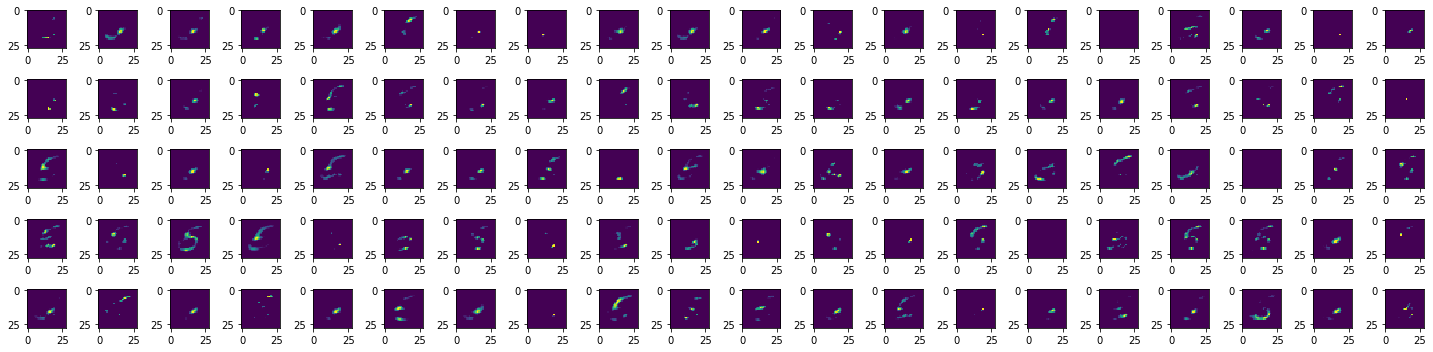

In [ ]:
fig, ax = plt.subplots(5,20,figsize=(20,5))
for index in range(100):
  c1=ax[int(index/20),int(index%20)].imshow(X_train_new[index].reshape(28,28), interpolation='nearest')
plt.tight_layout()
plt.show()